# Deep Neural Networks using Keras
Classification problem using Keras for multiclass problem, one input layer (2 nodes for x, y coordinates) and one output layer (5 node for each class).
<br>Output layer has categorical data using hot encoding

In [1]:
# Import all required modules
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.
/Users/nsanka/opt/miniconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/nsanka/opt/miniconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/nsanka/opt/miniconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/n

In [2]:
# Create Dataset using sklearn datasets
n_pts = 500
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]
X, y = datasets.make_blobs(n_samples=n_pts, random_state=123, centers=centers, cluster_std=0.4)

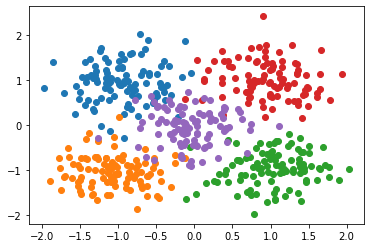

In [3]:
# Plot the Dataset
def scatter_plot():
    plt.scatter(X[y==0, 0], X[y==0, 1])
    plt.scatter(X[y==1, 0], X[y==1, 1])
    plt.scatter(X[y==2, 0], X[y==2, 1])
    plt.scatter(X[y==3, 0], X[y==3, 1])
    plt.scatter(X[y==4, 0], X[y==4, 1])
scatter_plot()

In [4]:
# Convert data labels 0, 1, 2, 3, 4 to categorical values using hot encoding
y_cat = to_categorical(y, 5)

In [5]:
# Define Keras sequential model
model = Sequential()
model.add(Dense(units=5, input_shape=(2,), activation='softmax'))
model.compile(Adam(lr=0.1), loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Train the model using the dataset and hot encodded labels
h = model.fit(x=X, y=y_cat, verbose=1, batch_size=50, epochs=100, shuffle='true')


Epoch 1/100
500/500 [==============================] - 0s 186us/step - loss: 1.5222 - accuracy: 0.4000
Epoch 2/100
500/500 [==============================] - 0s 28us/step - loss: 0.7133 - accuracy: 0.8280
Epoch 3/100
500/500 [==============================] - 0s 31us/step - loss: 0.4644 - accuracy: 0.9080
Epoch 4/100
500/500 [==============================] - 0s 42us/step - loss: 0.3668 - accuracy: 0.9380
Epoch 5/100
500/500 [==============================] - 0s 34us/step - loss: 0.3163 - accuracy: 0.9340
Epoch 6/100
500/500 [==============================] - 0s 33us/step - loss: 0.2844 - accuracy: 0.9400
Epoch 7/100
500/500 [==============================] - 0s 34us/step - loss: 0.2649 - accuracy: 0.9420
Epoch 8/100
500/500 [==============================] - 0s 37us/step - loss: 0.2504 - accuracy: 0.9460
Epoch 9/100
500/500 [==============================] - 0s 34us/step - loss: 0.2377 - accuracy: 0.9460
Epoch 10/100
500/500 [==============================] - 0s 33us/step - loss: 0.2

Text(0.5, 1.0, 'accuracy')

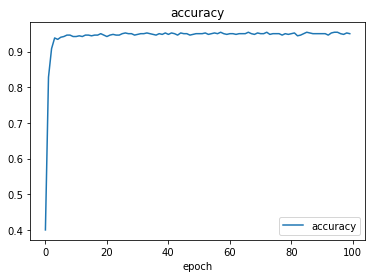

In [7]:
# Plot the Accuracy of the trained model
plt.plot(h.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

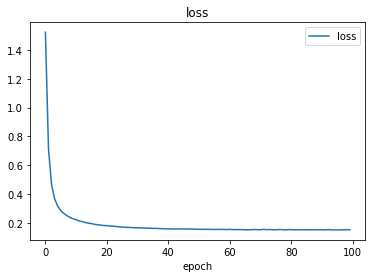

In [8]:
# Plot the Loss of the trained model
plt.plot(h.history['loss'])
plt.xlabel('epoch')
plt.legend(['loss'])
plt.title('loss')

In [9]:
# Define function to create grid and return contour plot of predictions
def plot_decision_boundary(X, pad):
    # Create x_span of 50 x 1 array of horizontal min and max
    x_span = np.linspace(min(X[:, 0]) - pad, max(X[:, 0]) + pad)
    # Create y_span of 50 x 1 array of vertical min and max
    y_span = np.linspace(min(X[:, 1]) - pad, max(X[:, 1]) + pad)
    # Crate mesh grid: xx (50x50) have x_span values as 50 rows and yy(50x50) have y_span values 50 columns
    xx, yy = np.meshgrid(x_span, y_span)
    # flatten the arrays xx, yy and concatinate them
    grid = np.c_[xx.ravel(), yy.ravel()]
    # Predict the probabilities of all the points in the grid
    pred_func = model.predict_classes(grid)
    # Reshape the probabilities to same shape as xx and convert to numpy array
    z = pred_func.reshape(xx.shape)
    # Plot Contours
    plt.contourf(xx, yy, z)

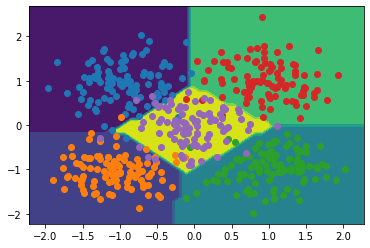

In [10]:
# Plot prediction contour and Input Dataset
plot_decision_boundary(X, 0.25)
scatter_plot()

Prediction of point class is  [3]


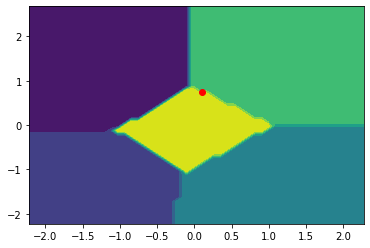

In [11]:
# Predict a class of given point
point = np.array([[0.1, 0.75]])
pred_point = model.predict_classes(point)
plt.plot(point[0][0], point[0][1], 'ro')
print('Prediction of point class is ', pred_point)
plot_decision_boundary(X, 0.25)